# **Laporan Proyek Machine Learning - Ivan Sholana**

## **Project Overview**
Seiring dengan pesatnya pertumbuhan industri hiburan digital, khususnya platform streaming film, kebutuhan akan sistem rekomendasi yang efektif menjadi semakin penting. Jumlah film yang tersedia secara daring terus meningkat, sehingga pengguna seringkali mengalami kesulitan dalam menemukan film yang sesuai dengan preferensi mereka. Oleh karena itu, sistem rekomendasi hadir sebagai solusi untuk membantu pengguna menemukan konten yang relevan dan menarik secara lebih efisien. Salah satu pendekatan yang banyak digunakan dalam pengembangan sistem rekomendasi adalah content-based filtering.

Content-based filtering bekerja dengan menganalisis kesamaan fitur konten dari item yang direkomendasikan. Dalam konteks project ini yang menggunakan rekomendasi film, content-based filtering memanfaatkan atribut-atribut seperti
- judul
- genre
- sinopsis
- kata kunci (keywords)
- pemeran (cast)
- sutradara (director)

Untuk menambah kualitas rekomendasi yang diberikan digunakan metrik popularitas seperti rating dan jumlah voting. Dengan menganalisis fitur-fitur tersebut, sistem dapat mengidentifikasi kemiripan antara film yang telah disukai pengguna sebelumnya dengan film lainnya dalam basis data, sehingga dapat memberikan rekomendasi yang lebih personal. Keunggulan sistem rekomendasi berbasis konten adalah kemampuannya dalam menghasilkan rekomendasi yang relevan tanpa memerlukan data preferensi dari banyak pengguna lain. Sistem ini berfokus pada profil preferensi masing-masing pengguna berdasarkan riwayat interaksi atau film favoritnya. Dengan demikian, pendekatan ini sangat sesuai untuk mengatasi permasalahan cold start yang umum terjadi pada pengguna baru dalam sistem rekomendasi berbasis kolaboratif.

## **PENTINGNYA PROYEK**
Proyek ini penting untuk dikembangkan karena beberapa alasan di bawah ini:
1. **Meningkatkan Pengalaman Pengguna dalam Konsumsi Konten** :
  - Melalui sistem rekomendasi film, dapat membantu pengguna menemukan film yang sesuai dengan minat mereka tanpa harus mencari secara manual di antara ribuan judul.
  - Melalui pemanfaatan fitur seperti sinopsis, genre, pemeran, dan sutradara, sistem rekomendasi ini dapat memberikan rekomendasi yang lebih relevan sehingga meningkatkan kepuasan pengguna.
2. **Relevansi dalam Industri Hiburan Digital** :  
  - Saat ini, platform seperti Netflix, Amazon Prime, dan lainnya sangat bergantung pada sistem rekomendasi untuk mempertahankan pengguna. Proyek ini relevan karena menawarkan pendekatan berbasis konten yang dapat diintegrasikan ke dalam platform tersebut, terutama untuk pengguna baru yang belum memiliki riwayat tontonan yang mana pada kondisi ini **pendekatan berbasis kolaborasi kurang efektif.**

# **BUSINESS UNDERSTANDING**

## **Problem Statements**
Untuk mencapai pengembangan sistem rekomendasi film berbasis *content-based filtering* yang efektif dan berkualitas, proyek ini dirancang untuk menjawab beberapa permasalahan utama sebagai berikut:

1. Bagaimana merancang sistem rekomendasi yang dapat menghasilkan rekomendasi film yang relevan dan dipersonalisasi berdasarkan fitur-fitur konten seperti judul, sinopsis, genre, kata kunci, pemeran, dan sutradara?

2. Bagaimana menangani permasalahan kualitas data, seperti nilai yang hilang (misalnya genre kosong) dan inkonsistensi format, agar data yang digunakan dalam sistem rekomendasi tetap valid dan dapat diandalkan?

3. Bagaimana mengintegrasikan metrik popularitas seperti *weighted rating* dan *normalized popularity* ke dalam sistem rekomendasi untuk memastikan film yang direkomendasikan tidak hanya relevan tetapi juga berkualitas dan diminati banyak pengguna?

## **Goals**
Untuk mencapai tujuan di atas, proyek ini mengusulkan pendekatan content-based filtering dengan langkah-langkah berikut:

1. **Merancang Sistem Rekomendasi:**
  - Menggunakan dataset credits, keywords, dan movies_metadata untuk mengekstrak fitur seperti pemeran, sutradara, genre, sinopsis, dan kata kunci.
  - Mengatasi nilai genre yang hilang dengan klasifikasi NLP.
  - Mengintegrasikan dataset menggunakan merge berbasis kolom id untuk menciptakan dataset gabungan yang konsisten.
  - Menggunakan cosine similarity untuk menghitung kesamaan antara vektor TF-IDF (judul) dan BERT embeddings (fitur gabungan) dari film input dengan semua film dalam dataset.
  - Menggabungkan bobot fitur popularitas
  - Mengambil 5 film dengan skor terbaik.

2. **Penyelesaian Dataset Null:**
  - Menerapkan TF-IDF Vectorizer untuk judul film guna merepresentasikan feature kata-kata fitur sinopsis ke dalam tipe data angka.
  - Melakukan klasifikasi menggunakan multiclass classification
  - Melakukan fine-tunning model Pre-Trained Transofrmer
  - Melakukan perbandingan hasil antara metode TF-IDF dan hasil fine-tunning.
  - Mengisi nan value genre dengan metode terbaik.

3. **Integrasi Metriks Popularitas** :
  - Menghitung weighted rating menggunakan formula yang mempertimbangkan jumlah voting (vote_count) dan rata-rata rating (vote_average), serta nilai rata-rata global (C) dan ambang batas voting (m).
  - Menormalkan popularity untuk memastikan skala yang konsisten dalam perhitungan skor akhir.


## **Solution Statements**
  1. Menggunakan cosine similarity untuk menghitung kesamaan antara vektor TF-IDF (judul) dan BERT embeddings (fitur gabungan) dari film input dengan semua film dalam dataset.
  2. Mengembangkan fungsi rekomendasi yang menerima judul film sebagai input dan mengembalikan top-N film (misalnya, 5 film) dengan skor tertinggi berdasarkan kombinasi kesamaan konten, weighted rating, dan popularity.
  3. Menggabungkan skor kesamaan (TF-IDF dan BERT-based) dengan weighted rating dan normalized popularity menggunakan bobot tertentu (misalnya, 0.2 untuk masing-masing metrik) untuk menghasilkan skor akhir yang seimbang.


# **DATA UNDERSTANDING**

Data Source: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset

In [1]:
import pandas as pd

In [4]:
credits = pd.read_csv('/content/drive/MyDrive/Project/Dicoding Recomendation System/credits.csv')
keywords = pd.read_csv('/content/drive/MyDrive/Project/Dicoding Recomendation System/keywords.csv')
movies_metadata = pd.read_csv('/content/drive/MyDrive/Project/Dicoding Recomendation System/movies_metadata.csv')

<ipython-input-4-9f1b5c0d9245>:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata = pd.read_csv('/content/drive/MyDrive/Project/Dicoding Recomendation System/movies_metadata.csv')


**GENERAL INFORMATION**

In [5]:
print("=== General Data Information ===")
print("\nCredits Dataset:")
print(f"Number of rows: {credits.shape}")
print(f"Number of columns: {credits.shape[1]}")
print("Columns:", list(credits.columns))
print("Missing values:\n")
display( credits.isnull().sum())
print("Data types:\n",credits.dtypes)

=== General Data Information ===

Credits Dataset:
Number of rows: (45476, 3)
Number of columns: 3
Columns: ['cast', 'crew', 'id']
Missing values:



,0
cast,0
crew,0
id,0


Data types:
 cast    object
crew    object
id       int64
dtype: object


| **Nama Fitur** | **Tipe Data** | **Deskripsi Singkat**                                                                 |
| -------------- | ------------- | ------------------------------------------------------------------------------------- |
| `cast`         | object        | Daftar pemeran (aktor/aktris) dalam film, biasanya disimpan dalam format JSON-like.   |
| `crew`         | object        | Daftar kru film, termasuk sutradara, penulis naskah, produser, dll. Format JSON-like. |
| `id`           | int / object  | ID unik film untuk menghubungkan data ini dengan dataset utama (`Movies Metadata`).   |


In [6]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [7]:
print("\nKeywords Dataset:")
print(f"Number of rows: {keywords.shape[0]}")
print(f"Number of columns: {keywords.shape[1]}")
print("Columns:", list(keywords.columns))
print("Missing values:\n")
display(keywords.isnull().sum())
print("Data types:\n", keywords.dtypes)


Keywords Dataset:
Number of rows: 46419
Number of columns: 2
Columns: ['id', 'keywords']
Missing values:



,0
id,0
keywords,0


Data types:
 id           int64
keywords    object
dtype: object


| **Nama Fitur** | **Tipe Data** | **Deskripsi Singkat**                                                                 |
| -------------- | ------------- | ------------------------------------------------------------------------------------- |
| `id`           | int64         | ID unik film yang digunakan untuk menghubungkan data ini dengan dataset utama.        |
| `keywords`     | object        | Kumpulan kata kunci deskriptif (tags) yang menggambarkan tema atau elemen utama film. |

In [8]:
print("\nMovies Metadata Dataset:")
print(f"Number of rows: {movies_metadata.shape[0]}")
print(f"Number of columns: {movies_metadata.shape[1]}")
print("Columns:", list(movies_metadata.columns))
display(movies_metadata.isnull().sum())
print("Data types:\n", movies_metadata.dtypes)


Movies Metadata Dataset:
Number of rows: 45466
Number of columns: 24
Columns: ['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count']


,0
adult,0
belongs_to_collection,40972
budget,0
genres,0
homepage,37684
id,0
imdb_id,17
original_language,11
original_title,0
overview,954


Data types:
 adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object


| **Nama Fitur**          | **Tipe Data** | **Deskripsi Singkat**                                                              |
| ----------------------- | ------------- | ---------------------------------------------------------------------------------- |
| `adult`                 | object        | Menunjukkan apakah film ditujukan untuk penonton dewasa (`True` atau `False`).     |
| `belongs_to_collection` | object        | Informasi apakah film merupakan bagian dari koleksi/waralaba film tertentu.        |
| `budget`                | object        | Anggaran produksi film dalam USD (banyak nilai nol atau tidak diketahui).          |
| `genres`                | object        | Daftar genre film dalam format JSON-like (misal: Action, Comedy, Drama).           |
| `homepage`              | object        | URL resmi situs web film, jika tersedia.                                           |
| `id`                    | object        | ID unik film dalam database ini (kadang tidak konsisten formatnya).                |
| `imdb_id`               | object        | ID film pada basis data IMDb (contoh: tt1234567).                                  |
| `original_language`     | object        | Kode bahasa asli film (contoh: `en` untuk Inggris, `fr` untuk Prancis).            |
| `original_title`        | object        | Judul asli film seperti yang dirilis pertama kali (sebelum translasi/judul lokal). |
| `overview`              | object        | Ringkasan atau sinopsis film.                                                      |
| `popularity`            | object        | Skor popularitas film (bisa berasal dari interaksi pengguna, views, dll).          |
| `poster_path`           | object        | Path URL untuk poster film (digunakan dalam tampilan visual atau UI).              |
| `production_companies`  | object        | Daftar perusahaan produksi film dalam format JSON-like.                            |
| `production_countries`  | object        | Negara tempat produksi film dilakukan.                                             |
| `release_date`          | object        | Tanggal rilis film (formatnya bisa bervariasi, perlu normalisasi).                 |
| `revenue`               | float64       | Pendapatan total film dalam USD.                                                   |
| `runtime`               | float64       | Durasi film dalam menit.                                                           |
| `spoken_languages`      | object        | Daftar bahasa yang digunakan dalam film.                                           |
| `status`                | object        | Status film (misal: `Released`, `Post Production`, dll).                           |
| `tagline`               | object        | Kalimat promosi singkat yang biasanya digunakan sebagai slogan film.               |
| `title`                 | object        | Judul film versi akhir yang ditampilkan.                                           |
| `video`                 | object        | Menunjukkan apakah entri merupakan video film (boolean dalam string).              |
| `vote_average`          | float64       | Rata-rata nilai rating film dari pengguna.                                         |
| `vote_count`            | float64       | Jumlah total suara atau voting yang diberikan pengguna.                            |

In [10]:
import ast

def get_cast_names(cast_str):
    cast_list = ast.literal_eval(cast_str)
    names = [cast_member['name'] for cast_member in cast_list]
    return '; '.join(names)

def get_director(crew_str):
    crew_list = ast.literal_eval(crew_str)
    directors = [crew_member['name'] for crew_member in crew_list if crew_member['job'] == 'Director']
    return '; '.join(directors)

# Create new dataframe with cast names and director
credits_processed = pd.DataFrame({
    'id': credits['id'],
    'cast_names': credits['cast'].apply(get_cast_names),
    'director': credits['crew'].apply(get_director)
})

### **Fungsi `get_cast_names(cast_str)`**

Tujuan dari fungsi ini adalah untuk mengekstrak nama-nama pemeran dari data yang berisi informasi cast setiap film. Fungsi ini menyederhanakan informasi cast menjadi sebuah daftar nama pemeran yang dipisahkan oleh titik koma, memudahkan akses dan analisis data terkait aktor atau aktris yang terlibat dalam film.

### **Fungsi `get_director(crew_str)`**

Tujuan dari fungsi ini adalah untuk mengekstrak nama sutradara dari data crew setiap film. Dengan fungsi ini, kita bisa memperoleh daftar nama sutradara yang terlibat dalam pembuatan film, dan menyajikannya dalam format yang lebih mudah diakses dan dianalisis.

### **Membuat DataFrame Baru `credits_processed`**

Tujuan dari bagian ini adalah untuk membuat DataFrame baru yang menyertakan informasi penting dari kolom `cast` dan `crew`, yaitu nama-nama pemeran dan sutradara, dalam format yang lebih terstruktur. DataFrame baru ini mempermudah penggunaan informasi tersebut untuk analisis lebih lanjut atau untuk digunakan dalam sistem rekomendasi film.

In [ ]:
credits_processed.head()

,id,cast_names,director
0,862,Tom Hanks; Tim Allen; Don Rickles; Jim Varney;...,John Lasseter
1,8844,Robin Williams; Jonathan Hyde; Kirsten Dunst; ...,Joe Johnston
2,15602,Walter Matthau; Jack Lemmon; Ann-Margret; Soph...,Howard Deutch
3,31357,Whitney Houston; Angela Bassett; Loretta Devin...,Forest Whitaker
4,11862,Steve Martin; Diane Keaton; Martin Short; Kimb...,Charles Shyer


# **DATA PREPARATION**

**MOVIE METADATA DATASET**

Mengambil fitur penting yang relevan dengan content-based filtering dan keperluan rekomendasi

In [9]:
# Select important columns
important_columns = [
    'id', 'title', 'genres', 'overview',
    'vote_average', 'vote_count',
    'popularity', 'production_companies'
]
movies_metadata_selected = movies_metadata[important_columns].copy()
# Drop rows where overview is NaN
movies_metadata_selected = movies_metadata_selected.dropna(subset=['overview'])

movies_metadata_selected.head()

,id,title,genres,overview,vote_average,vote_count,popularity,production_companies
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","Led by Woody, Andy's toys live happily in his ...",7.7,5415.0,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]"
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When siblings Judy and Peter discover an encha...,6.9,2413.0,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na..."
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",A family wedding reignites the ancient feud be...,6.5,92.0,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'..."
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","Cheated on, mistreated and stepped on, the wom...",6.1,34.0,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",Just when George Banks has recovered from his ...,5.7,173.0,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}..."


### **Fungsi `get_genre_names`**

Tujuan dari fungsi ini adalah untuk mengekstrak dan menyajikan nama-nama genre film dalam format yang lebih sederhana dan mudah dibaca. Dengan mengubah data genre yang awalnya kompleks menjadi daftar nama genre yang dipisahkan titik koma, informasi genre setiap film menjadi lebih mudah diolah dan dianalisis.

### **Fungsi `get_production_companies`**

Fungsi ini bertujuan untuk mengambil dan menyusun nama-nama perusahaan produksi yang terlibat dalam pembuatan film. Data yang semula tersimpan dalam bentuk tidak langsung dibaca, diubah menjadi daftar nama perusahaan yang tersusun rapi, sehingga mempermudah pemahaman dan penggunaan informasi tersebut dalam analisis film.

### **Pengolahan Kolom pada `movies_metadata_selected`**

Bagian ini bertujuan untuk memperbarui data film dengan mengganti format genre dan perusahaan produksi menjadi lebih ringkas dan terstruktur. Hasilnya, informasi penting pada dataset menjadi lebih siap untuk digunakan dalam analisis data maupun sistem rekomendasi film.

In [12]:
def get_genre_names(genres_str):
    try:
        if pd.isna(genres_str['genres']):
            return genres_str['genres']  # Return NaN as is
        if genres_str['genres'] == '[]':
            return ''
        genres = ast.literal_eval(genres_str['genres'])
        return '; '.join([genre['name'] for genre in genres])
    except:
        return ''

def get_production_companies(production_companies_str):
    try:
        if pd.isna(production_companies_str['production_companies']):
            return production_companies_str['production_companies']  # Return NaN as is
        if production_companies_str['production_companies'] == '[]':
            return ''
        companies = ast.literal_eval(production_companies_str['production_companies'])
        return '; '.join([company['name'] for company in companies])
    except:
        return ''

movies_metadata_selected['genres'] = movies_metadata_selected.apply(get_genre_names, axis=1)
movies_metadata_selected['production_companies'] = movies_metadata_selected.apply(get_production_companies, axis=1)

### **FILL NAN GENRE DATASET WITH TF-IDF**

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MultiLabelBinarizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Memisahkan dataset yang tidak memiliki genre dan tidak berdasarkan panjang data yang dimilikinya

In [14]:
# Pisahkan data dengan genre yang ada dan yang kosong
df_with_genres = movies_metadata_selected[movies_metadata_selected['genres'].apply(len) > 0].copy()
df_without_genres = movies_metadata_selected[movies_metadata_selected['genres'].apply(len) == 0].copy()

def parse_genres(genres_str):
    if pd.isna(genres_str) or genres_str == '':
        return []
    return [g.strip() for g in genres_str.split(';')]

df_with_genres['genres'] = df_with_genres['genres'].apply(parse_genres)

Mengambil label pertama saja dikarenakan distribusi genre yang ada sangat inbalance
dan variasi sehingga akan sangat mempengaruhi hasil akhir modelling

In [15]:
df_with_genres['genres_one'] = df_with_genres['genres'].apply(lambda x: x[0])

In [16]:
df_with_genres['genres_one'].unique()

array(['Animation', 'Adventure', 'Romance', 'Comedy', 'Action', 'Family',
       'History', 'Drama', 'Crime', 'Fantasy', 'Science Fiction',
       'Thriller', 'Music', 'Horror', 'Documentary', 'Mystery', 'Western',
       'TV Movie', 'War', 'Foreign', 'Carousel Productions', 'Aniplex',
       'Odyssey Media'], dtype=object)

Menghapus genre yang tidak valid

In [17]:
# Filter out rows where 'genres' contains any of the specified production companies
for company in ['Carousel Production', 'Aniplex', 'Odyssey Media']:
    df_with_genres = df_with_genres[~df_with_genres['genres_one'].str.contains(company, na=False)]

<Axes: xlabel='genres_one'>

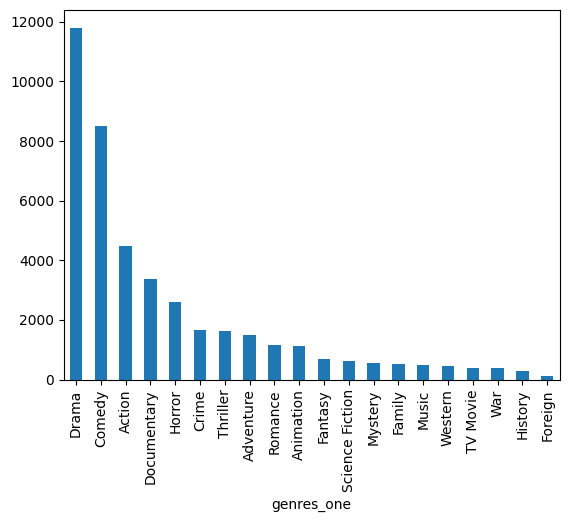

In [18]:
df_with_genres['genres_one'].value_counts().plot(kind='bar')

Hasil grafik di atas menunjukkan bahwa dataset mengalami unbalance yang tinggi sehingga akan sangat berpotensi mendapatkan hasil metriks evaluasi yang jelek.

In [19]:
# Split string genres jadi list
movies_metadata_selected['genres_split'] = movies_metadata_selected['genres'].str.split('; ')

# Explode agar setiap genre jadi baris sendiri
movies_metadata_selected_exploded = movies_metadata_selected.explode('genres_split').reset_index(drop=True)

<Axes: xlabel='genres_split'>

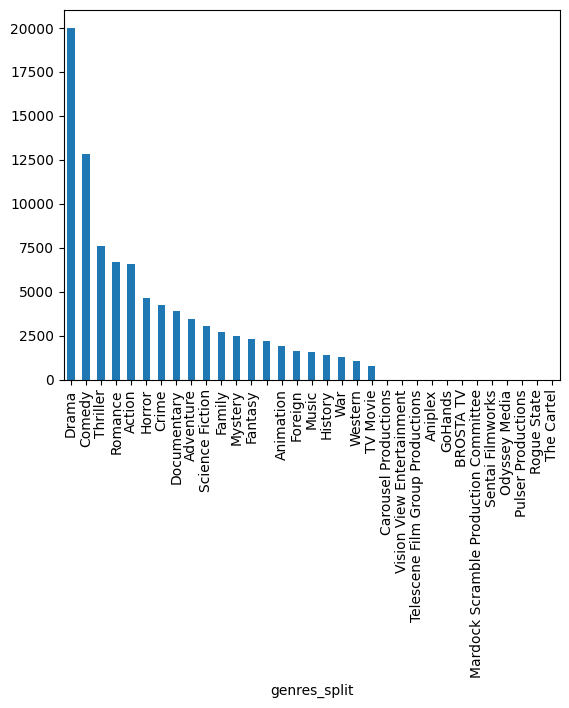

In [20]:
movies_metadata_selected_exploded['genres_split'].value_counts().plot(kind='bar')

In [21]:
movies_metadata_selected_exploded['genres_split'].value_counts()

,count
genres_split,
Drama,20023
Comedy,12806
Thriller,7586
Romance,6673
Action,6565
Horror,4660
Crime,4269
Documentary,3886
Adventure,3470


Hasil di atas menunjukkan bahwa jika ditotal dari setiap genre yang ada di dalam movie maka label tetap tidak seimbang sehingga akan mempengaruhi kualitas prediksi.

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words]
    return ' '.join(tokens)

df_with_genres['processed_overview'] = df_with_genres['overview'].apply(preprocess_text)

In [ ]:
df_with_genres['processed_overview'].head()

,processed_overview
0,led woody andys toy live happily room andys bi...
1,sibling judy peter discover enchanted board ga...
2,family wedding reignites ancient feud nextdoor...
3,cheated mistreated stepped woman holding breat...
4,george bank recovered daughter wedding receive...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_with_genres['processed_overview'])

# Label encoding
le = LabelEncoder()
y = le.fit_transform(df_with_genres['genres_one'])

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Predict on test set
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision, Recall, F1-score (macro = rata-rata antar kelas)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1 Score (macro): {f1:.4f}")

# Classification report (lebih detail per kelas)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.4418
Precision (macro): 0.2397
Recall (macro): 0.1342
F1 Score (macro): 0.1303

Classification Report:
                 precision    recall  f1-score   support

         Action       0.40      0.46      0.43       894
      Adventure       0.35      0.02      0.05       289
      Animation       1.00      0.04      0.08       229
         Comedy       0.48      0.50      0.49      1745
          Crime       0.14      0.00      0.01       336
    Documentary       0.70      0.54      0.61       677
          Drama       0.40      0.81      0.54      2362
         Family       0.00      0.00      0.00       101
        Fantasy       0.00      0.00      0.00       132
        Foreign       0.00      0.00      0.00        33
        History       0.00      0.00      0.00        53
         Horror       0.57      0.29      0.39       551
          Music       0.00      0.00      0.00        89
        Mystery       0.00      0.00      0.00        92
        Romance       0.00   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Hasil di atas menunjukkan bahwa model gagal memprediksi genre minoritas karena kualitas data yang inbalance

### **PREDICT GENRE USING PRETRAINED MODEL**

In [ ]:
import torch
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from torch.optim import AdamW
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

#### **1. DATA CLEANING**
Membersihkan dataset dari genre yang salah

In [ ]:
# Daftar 'genre' yang sebenarnya adalah nama production company dan harus dihapus
fake_genres = [
    "Carousel Productions", "Vision View Entertainment", "Telescene Film Group Productions",
    "Aniplex", "GoHands", "BROSTA TV", "Mardock Scramble Production Committee",
    "Sentai Filmworks", "Odyssey Media", "Pulser Productions", "Rogue State", "The Cartel"
]

# Hapus baris jika ada salah satu item di fake_genres muncul di kolom genres
df_cleaned = df_with_genres[~df_with_genres['genres'].apply(lambda x: any(g in fake_genres for g in x))].reset_index(drop=True)

In [ ]:
df_cleaned['genres'].head()

,genres
0,"[Animation, Comedy, Family]"
1,"[Adventure, Fantasy, Family]"
2,"[Romance, Comedy]"
3,"[Comedy, Drama, Romance]"
4,[Comedy]


In [ ]:
# Split string genres jadi list
movies_metadata_selected['genres_split'] = df_cleaned['genres']

# Explode agar setiap genre jadi baris sendiri
movies_metadata_selected_exploded = movies_metadata_selected.explode('genres_split').reset_index(drop=True)

In [ ]:
# Daftar genre unik (sesuaikan dengan dataset Anda)
GENRES = movies_metadata_selected_exploded['genres_split'].dropna().unique()
NUM_LABELS = len(GENRES)

In [ ]:
# Fungsi untuk mengubah list genre menjadi vektor biner
def genres_to_vector(genres_list, all_genres):
    vector = [1 if genre in genres_list else 0 for genre in all_genres]
    return vector

#### **2. MODELLING AND TRAINING**

In [ ]:
# Kelas TextDataset untuk Multilabel
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.float)
        }

In [ ]:
# Fungsi Pelatihan
def train_model(model, data_loader, optimizer, device, pos_weight):
    model.train()
    total_loss = 0
    for batch in data_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
        loss = loss_fn(logits, labels)
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    return total_loss / len(data_loader)

In [ ]:
# Fungsi Evaluasi
def eval_model(model, data_loader, device, thresholds=None):
    if thresholds is None:
        thresholds = [0.5] * NUM_LABELS
    model.eval()
    total_loss = 0
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            loss_fn = torch.nn.BCEWithLogitsLoss()
            loss = loss_fn(logits, labels)
            total_loss += loss.item()

            probs = torch.sigmoid(logits)
            preds = torch.zeros_like(probs)
            for i, threshold in enumerate(thresholds):
                preds[:, i] = (probs[:, i] > threshold).float()

            predictions.append(preds.cpu())
            true_labels.append(labels.cpu())

    predictions = torch.cat(predictions)
    true_labels = torch.cat(true_labels)
    macro_f1 = f1_score(true_labels.numpy(), predictions.numpy(), average='macro')
    micro_f1 = f1_score(true_labels.numpy(), predictions.numpy(), average='micro')
    accuracy_per_label = (predictions == true_labels).float().mean(dim=0)

    return total_loss / len(data_loader), macro_f1, micro_f1, accuracy_per_label

In [ ]:
# Parameter
MAX_LEN = 256  # Sinopsis biasanya lebih panjang, jadi gunakan 256
BATCH_SIZE = 16
EPOCHS = 10
LEARNING_RATE = 2e-5

In [ ]:
df_with_genres['labels'] = df_with_genres['genres'].apply(lambda x: genres_to_vector(x, GENRES))
texts = df_with_genres['overview'].tolist()
labels = df_with_genres['labels'].tolist()

In [ ]:
# Split data
train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)

In [ ]:
# Inisialisasi tokenizer dan model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=NUM_LABELS,
    problem_type="multi_label_classification"
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Pindah model ke device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Inisialisasi dataset dan dataloader
train_dataset = TextDataset(train_texts, train_labels, tokenizer, MAX_LEN)
val_dataset = TextDataset(val_texts, val_labels, tokenizer, MAX_LEN)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

# Hitung pos_weight untuk ketidakseimbangan
labels_np = np.array(labels)
pos_freq = np.mean(labels_np, axis=0)
neg_freq = 1 - pos_freq
pos_weight = torch.tensor(neg_freq / (pos_freq + 1e-10)).to(device)

# Optimizer
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)

In [ ]:
# Loop pelatihan
for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    train_loss = train_model(model, train_loader, optimizer, device, pos_weight)
    val_loss, macro_f1, micro_f1, acc_per_label = eval_model(model, val_loader, device)
    print(f'Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
    print(f'Macro F1: {macro_f1:.4f}, Micro F1: {micro_f1:.4f}')
    print(f'Accuracy per genre: {dict(zip(GENRES, acc_per_label.numpy()))}')

# Simpan model
model.save_pretrained('fine_tuned_distilbert_genre')
tokenizer.save_pretrained('fine_tuned_distilbert_genre')

Epoch 1/10
Train Loss: 0.8074, Val Loss: 0.4229
Macro F1: 0.4367, Micro F1: 0.4681
Accuracy per genre: {'Animation': np.float32(0.83969283), 'Comedy': np.float32(0.7143532), 'Family': np.float32(0.81890136), 'Adventure': np.float32(0.8138216), 'Fantasy': np.float32(0.76739514), 'Romance': np.float32(0.7735381), 'Drama': np.float32(0.71978736), 'Action': np.float32(0.8119315), 'Crime': np.float32(0.8253987), 'Thriller': np.float32(0.75699943), 'Horror': np.float32(0.83118725), 'History': np.float32(0.8581217), 'Science Fiction': np.float32(0.8620201), 'Mystery': np.float32(0.7469581), 'War': np.float32(0.91836977), 'Foreign': np.float32(0.7582989), 'Music': np.float32(0.84418195), 'Documentary': np.float32(0.944241), 'Western': np.float32(0.97365624), 'TV Movie': np.float32(0.5523922)}
Epoch 2/10
Train Loss: 0.6169, Val Loss: 0.3464
Macro F1: 0.4834, Micro F1: 0.5246
Accuracy per genre: {'Animation': np.float32(0.902658), 'Comedy': np.float32(0.75569993), 'Family': np.float32(0.8876551)

('fine_tuned_distilbert_genre/tokenizer_config.json',
 'fine_tuned_distilbert_genre/special_tokens_map.json',
 'fine_tuned_distilbert_genre/vocab.txt',
 'fine_tuned_distilbert_genre/added_tokens.json')

Hasil macro F1 score menunjukkan peningkatan yang sangat signifikan bahkan pada multilable class. Pada finetunning menghasilkan 59% sedangkan penggunaan TF-IDF dan MultinomialNB menghasilkan 14%.

#### **3. PREDICT GENRE**

In [ ]:
# Function to tokenize text data
def tokenize_data(texts, tokenizer, max_length=128):
    encodings = tokenizer(
        texts.tolist(),
        truncation=True,
        padding=True,
        max_length=max_length,
        return_tensors='pt'
    )
    return encodings

# Tokenize the text data from df_without_genres
texts = df_without_genres['overview']  # Replace 'text' with your actual column name
encodings = tokenize_data(texts, tokenizer)

# Prepare inputs for the model
input_ids = encodings['input_ids'].to(device)
attention_mask = encodings['attention_mask'].to(device)

In [ ]:
# Load the fine-tuned model and tokenizer
model_path = '/content/drive/MyDrive/fine_tuned_distilbert_genre'
tokenizer = DistilBertTokenizer.from_pretrained(model_path)
model = DistilBertForSequenceClassification.from_pretrained(model_path)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model.eval()

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [ ]:
# Function to tokenize text data
def tokenize_data(texts, tokenizer, max_length=128):
    encodings = tokenizer(
        texts.tolist(),
        truncation=True,
        padding=True,
        max_length=max_length,
        return_tensors='pt'
    )
    return encodings

# Tokenize the text data from df_without_genres
texts = df_without_genres['overview']  # Replace 'text' with your actual column name
encodings = tokenize_data(texts, tokenizer)

# Prepare inputs for the model
input_ids = encodings['input_ids'].to(device)
attention_mask = encodings['attention_mask'].to(device)

In [ ]:
from torch.nn.functional import sigmoid

# Make predictions in batches (optional, for large datasets)
batch_size = 16
predicted_genres = []
with torch.no_grad():
    for i in range(0, len(input_ids), batch_size):
        batch_input_ids = input_ids[i:i + batch_size]
        batch_attention_mask = attention_mask[i:i + batch_size]
        outputs = model(batch_input_ids, attention_mask=batch_attention_mask)
        logits = outputs.logits
        probs = sigmoid(logits)  # Sigmoid for multi-label probabilities
        batch_preds = (probs > 0.5).int().cpu().numpy()  # Threshold at 0.5
        for pred in batch_preds:
            genres = [GENRES[j] for j, val in enumerate(pred) if val == 1]
            predicted_genres.append(genres if genres else ['None'])

# Add predictions to the DataFrame
df_without_genres['predicted_genres'] = predicted_genres

In [ ]:
# View the results
df_without_genres[['overview', 'predicted_genres']]

,overview,predicted_genres
55,"Set in modern times, Alex finds King Arthur's ...","[Adventure, Fantasy, Romance, Action, Science ..."
83,"Filmed entirely on location in East Hampton, L...","[Comedy, Drama]"
126,"Michel Negroponte, a documentary filmmaker, me...","[Fantasy, Romance, Drama, Mystery]"
137,A subtle yet violent commentary on feudal lords.,"[Drama, History]"
390,Jackie and Eugene are joined by a mystical win...,"[Adventure, Drama]"
...,...,...
45447,The background of this picture represents a sc...,[Comedy]
45448,This shows a prince entering upon the stage of...,[Horror]
45455,Sentenced to life imprisonment for illegal act...,[Drama]
45464,"In a small town live two brothers, one a minis...","[Drama, Horror]"


In [ ]:
movies_metadata_selected = pd.concat([df_with_genres, df_without_genres], ignore_index=True)

### **FEATURE ENGINEERING RATE**

Tahapan ini adalah berusaha memberikan peringkat lebih adil dengan mempertimbangkan baik kuantitas (jumlah vote) maupun kualitas (rating) sehingga menghindari bias terhadap film dengan sedikit vote namun rating tinggi, agar tidak mendominasi daftar film terbaik.

In [ ]:
m = movies_metadata_selected['vote_count'].quantile(0.9)  # Minimum votes (top 10%)
C = movies_metadata_selected['vote_average'].mean()       # Mean vote across all movies
movies_metadata_selected['weighted_rating'] = movies_metadata_selected.apply(
    lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C),
    axis=1
)

movies_metadata_selected['vote_count_normalized'] = (movies_metadata_selected['vote_count'] - movies_metadata_selected['vote_count'].min()) / (movies_metadata_selected['vote_count'].max() - movies_metadata_selected['vote_count'].min())

## **KEYWORDS PREPEARATION**

Menggabungkan semua keyword untuk menjadi content based feature

In [ ]:
import ast

def extract_keywords(keyword_list):
    return ' '.join([kw['name'].replace(" ", "") for kw in keyword_list])

# Kalau datanya string JSON:
keywords['keywords'] = keywords['keywords'].apply(lambda x: extract_keywords(ast.literal_eval(x)))

In [ ]:
keywords.head()

,id,keywords
0,862,jealousy toy boy friendship friends rivalry bo...
1,8844,boardgame disappearance basedonchildren'sbook ...
2,15602,fishing bestfriend duringcreditsstinger oldmen
3,31357,basedonnovel interracialrelationship singlemot...
4,11862,baby midlifecrisis confidence aging daughter m...


## **COMBINE DATASET**

Mengkonversi tipe data id agar dimungkinkan untuk melakukan penggabungan berdasarkan id

In [ ]:
# Convert id to numeric, coercing errors to NaN
movies_metadata_selected['id'] = pd.to_numeric(movies_metadata_selected['id'], errors='coerce')
# Drop rows where id is NaN
movies_metadata_selected = movies_metadata_selected.dropna(subset=['id'])
# Convert id to integer
movies_metadata_selected['id'] = movies_metadata_selected['id'].astype(int)

credits_processed['id'] = pd.to_numeric(credits_processed['id'], errors='coerce')

keywords['id'] = pd.to_numeric(keywords['id'], errors='coerce')

In [ ]:
combined_df = pd.merge(movies_metadata_selected, credits_processed, on='id', how='left')
combined_df = pd.merge(combined_df, keywords, on='id', how='left')

Menggabungkan genre yang berbentuk list menjadi sebuah satu string dan menghapus movie yang tidak memiliki genre

In [ ]:
combined_df['genres'] = combined_df['genres'].apply(lambda x: ' '.join(x))
combined_df = combined_df[combined_df['genres'].notna() & ~combined_df['genres'].isin(['', ' '])]

Menggabungkan semua content yang dimiliki oleh feature untuk menjadi satu feature yang dapat mewakili semua feature secara bersamaan

In [ ]:
combined_df['combined_features'] = (
    combined_df['overview'].fillna('') + ' ' +
    combined_df['keywords'] + ' ' +
    combined_df['genres'] + ' ' +
    combined_df['cast_names'].fillna('') + ' ' +
    combined_df['director'].fillna('')
)

In [ ]:
content_based_recommendations = combined_df[['id', 'title', 'genres', 'combined_features','vote_count_normalized','popularity','weighted_rating']].copy()

In [ ]:
content_based_recommendations = content_based_recommendations.dropna()

In [ ]:
from sentence_transformers import SentenceTransformer, util
import torch

# Cek apakah GPU tersedia
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

Using device: cuda


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Reset index to ensure proper alignment
content_based_recommendations = content_based_recommendations.reset_index(drop=True)

# TF-IDF for titles
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(content_based_recommendations['title'])

# Load model ke device
model_path = '/content/drive/MyDrive/fine_tuned_distilbert_genre'
tokenizer = DistilBertTokenizer.from_pretrained(model_path)
model = SentenceTransformer('all-MiniLM-L6-v2', device=device)
bert_matrix = model.encode(content_based_recommendations['combined_features'].values, show_progress_bar=True)

# Convert bert_matrix to scipy sparse matrix for consistency
from scipy.sparse import csr_matrix

# Encode data (otomatis akan pakai GPU kalau device='cuda')
bert_matrix = model.encode(
    content_based_recommendations['combined_features'].values,
    show_progress_bar=True,
    device=device  # pastikan ini ditambahkan
)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1356 [00:00<?, ?it/s]

Batches:   0%|          | 0/1356 [00:00<?, ?it/s]

# **MODELLING**

Fungsi recommend bertujuan untuk menghasilkan rekomendasi film berdasarkan kemiripan konten dengan film tertentu yang dijadikan acuan (berdasarkan judul). Untuk itu, fungsi ini menggabungkan dua pendekatan perhitungan kemiripan, yaitu menggunakan model berbasis TF-IDF dan model berbasis BERT, dengan pembobotan yang dapat disesuaikan melalui parameter alpha dan beta. Apabila judul film tidak ditemukan dalam data TF-IDF, maka sistem tetap memberikan rekomendasi dengan hanya mengandalkan representasi semantik dari BERT. Setelah skor kemiripan dihitung, fungsi ini menambahkan komponen evaluasi tambahan berupa popularitas dan rating film, yang telah dinormalisasi, guna memastikan film yang direkomendasikan tidak hanya relevan dari sisi konten tetapi juga memiliki kualitas dan popularitas tinggi. Akhirnya, fungsi ini mengurutkan hasil berdasarkan skor akhir dan mengembalikan sejumlah film teratas yang paling sesuai dengan preferensi yang dimaksud. Dengan pendekatan ini, sistem dapat memberikan hasil rekomendasi yang lebih akurat, personal, dan berkualitas tinggi.

In [ ]:
# Fungsi cari index dari judul input
def get_index_from_title(title):
    return content_based_recommendations[content_based_recommendations['title'].str.lower() == title.lower()].index[0]

# Fungsi similarity
def get_similarity_scores(index):
    tfidf_scores = cosine_similarity(tfidf_matrix[index], tfidf_matrix).flatten()
    bert_scores = cosine_similarity([bert_matrix[index]], bert_matrix).flatten()
    return tfidf_scores, bert_scores

In [ ]:
def recommend(title, alpha=0.4, beta=0.6, top_n=5):
    try:
        index = get_index_from_title(title)
        tfidf_scores, bert_scores = get_similarity_scores(index)

        # Jika title ditemukan, gabungkan TF-IDF dan BERT
        content_score = alpha * tfidf_scores + beta * bert_scores

    except IndexError:
        # Kalau title tidak ditemukan, gunakan hanya BERT
        print(f"⚠️ Title '{title}' not found. Recommending based on content only.")
        # Kosongkan tfidf_scores agar alpha tidak digunakan
        tfidf_scores = np.zeros(len(content_based_recommendations))
        bert_scores = cosine_similarity([model.encode(title)], bert_matrix).flatten()
        content_score = bert_scores

    # Pastikan kolom numerik sudah bersih
    content_based_recommendations['popularity'] = pd.to_numeric(content_based_recommendations['popularity'], errors='coerce').fillna(0)
    normalized_rating = content_based_recommendations['weighted_rating'] / content_based_recommendations['weighted_rating'].max()
    normalized_popularity = content_based_recommendations['popularity'] / content_based_recommendations['popularity'].max()

    # Skor akhir
    final_score = content_score + 0.2 * normalized_rating + 0.2 * normalized_popularity

    # Urutkan dan ambil top-N
    top_indices = final_score.argsort()[-top_n-1:-1][::-1]


    return content_based_recommendations.iloc[top_indices][['title', 'genres','weighted_rating', 'popularity']]

# **EVALUATION**

Kode tersebut bertujuan untuk menganalisis hasil rekomendasi film berdasarkan genre yang muncul dari setiap judul film yang diberikan. Untuk setiap judul dalam daftar, sistem menghasilkan rekomendasi film dan mengambil informasi genre dari hasil tersebut. Genre yang awalnya berupa string kemudian diolah menjadi format list agar dapat dianalisis lebih lanjut. Dari kumpulan genre tersebut, sistem mengidentifikasi semua genre unik yang muncul, sehingga bisa diketahui keragaman genre dalam rekomendasi. Selanjutnya, sistem menghitung seberapa sering masing-masing genre muncul di antara film-film yang direkomendasikan, guna mengetahui genre mana yang paling dominan. Akhirnya, dari frekuensi kemunculan genre tersebut, sistem mencatat skor tertinggi sebagai representasi tingkat relevansi genre paling dominan dalam setiap hasil rekomendasi. Proses ini dapat membantu dalam evaluasi performa sistem rekomendasi serta memahami preferensi genre yang ditangkap oleh model.

In [ ]:
title_keywords = [
    # Action/Adventure
    "mission", "quest", "journey", "escape", "chase", "battle", "war", "hero",
    "legend", "adventure", "survivor", "hunter", "rebel", "outlaw", "guardian",

    # Sci-Fi/Fantasy
    "star", "galaxy", "space", "time", "future", "alien", "robot", "machine",
    "dimension", "portal", "magic", "wizard", "dragon", "kingdom", "curse",

    # Drama/Romance
    "love", "heart", "dream", "life", "story", "soul", "forever", "kiss",
    "promise", "fate", "destiny", "summer", "autumn", "winter", "spring",

    # Comedy
    "funny", "crazy", "wild", "party", "road", "trip", "big", "bad",
    "super", "great", "misadventure", "buddy", "wedding", "night",

    # Horror/Thriller
    "dark", "night", "shadow", "fear", "ghost", "haunted", "evil", "dead",
    "scream", "blood", "curse", "mystery", "secret", "killer", "trap",

    # Crime/Mystery
    "murder", "crime", "detective", "case", "suspect", "thief", "gangster",
    "heist", "justice", "law", "order", "conspiracy", "truth", "lie",

    # Historical/Biography
    "king", "queen", "emperor", "warrior", "glory", "honor", "legacy",
    "rise", "fall", "empire", "revolution", "freedom", "battle", "hero",

    # Family/Animation
    "kid", "family", "friend", "dog", "cat", "bear", "lion", "prince",
    "princess", "adventure", "world", "magic", "toy", "dream",

    # Western
    "cowboy", "sheriff", "bandit", "desert", "gold", "frontier", "town",
    "duel", "rider", "trail", "sunset", "valley", "river",

    # Musical
    "song", "dance", "music", "band", "stage", "show", "star", "rhythm",
    "melody", "dream", "shine", "harmony", "sound",

    # General/Universal
    "last", "first", "new", "old", "lost", "found", "hidden", "broken",
    "forgotten", "end", "beginning", "home", "city", "island", "sky",
    "sea", "road", "path", "way", "man", "woman", "boy", "girl"
]

In [ ]:
all_max_score = []

In [ ]:
for title  in title_keywords:
  film_recomendation = recommend(title)

  # Ambil kolom genres
  retrieved_genres = film_recomendation['genres']

  # Pisahkan string genre menjadi list, tangani non-string
  all_genres = retrieved_genres.apply(lambda x: x.split(' ') if isinstance(x, str) else [])

  # Buat set dari semua genre unik, hindari string kosong
  all_unique_genres = set(genre for sublist in all_genres for genre in sublist if genre)

  # Inisialisasi dictionary untuk menyimpan frekuensi genre
  scores_dict = {genre: 0 for genre in all_unique_genres}

  # Hitung frekuensi setiap genre dengan cara lebih efisien
  for genres in all_genres:
      for genre in genres:
          if genre in scores_dict:
              scores_dict[genre] += 1

  # Ambil semua nilai frekuensi
  all_score = list(scores_dict.values())

  # Tentukan tingkatan relevansi berdasarkan frekuensi tertinggi
  max_score = max(all_score) if all_score else 0

  all_max_score.append(max_score)

⚠️ Title 'mission' not found. Recommending based on content only.
⚠️ Title 'chase' not found. Recommending based on content only.
⚠️ Title 'battle' not found. Recommending based on content only.
⚠️ Title 'hunter' not found. Recommending based on content only.
⚠️ Title 'rebel' not found. Recommending based on content only.
⚠️ Title 'galaxy' not found. Recommending based on content only.
⚠️ Title 'future' not found. Recommending based on content only.
⚠️ Title 'robot' not found. Recommending based on content only.
⚠️ Title 'machine' not found. Recommending based on content only.
⚠️ Title 'dimension' not found. Recommending based on content only.
⚠️ Title 'portal' not found. Recommending based on content only.
⚠️ Title 'wizard' not found. Recommending based on content only.
⚠️ Title 'kingdom' not found. Recommending based on content only.
⚠️ Title 'heart' not found. Recommending based on content only.
⚠️ Title 'story' not found. Recommending based on content only.
⚠️ Title 'soul' not foun

In [ ]:
total_score = 0

for score in all_max_score:
  total_score += score

average_score = total_score / len(all_max_score)
average_score

3.3878787878787877